# PROJET STATISTIQUE

* ## Installation et chargement des packages necessaires

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [51]:
# CHARGEMENTS DES PACKAGES NECESSAIRES
import pandas as pd
from collections import Counter # va permettre de calculer les mots frequents
from wordcloud import WordCloud # va permettre de faire un nuage de mots pour faire ressortir les mots les plus frequents
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

* ## IMPORTATION DES DONNEES

In [3]:
data = pd.read_excel("makeorg_sport.xlsx")

##  STATISTIQUES DESCRIPTIVES

In [54]:
print(data)

                                            Proposition Nom d'auteur   Âge  \
0     Il faut sensibiliser les enfants depuis le plu...    DOMINIQUE  68.0   
1     Il faut que les communes facilitent la "marche...        Klaus  53.0   
2     Il faut dès l'école faire le lien entre la san...          Léo  46.0   
3     Il faut être très rigoureux des l'enfance sur ...        Cathy  60.0   
4     Il faut permettre à ceux ayant un handicap et ...     Bertrand   NaN   
...                                                 ...          ...   ...   
1904  Il faut adopter un chien ça fera à minima 45 m...       Esther   NaN   
1905  Il faut pouvoir exclure tout membre d’une fédé...     Caroline  57.0   
1906  Il faut réduire le nombre d'arrêt de bus en vi...        Alain  50.0   
1907  Il faut inciter les Français à s'équiper de mo...       Esther  61.0   
1908  Il faut encourager les garçons à s'inscrire da...        Cérès   NaN   

      Département Zone d'adhésion  Nb de votes  Zone score  % p

In [55]:
print(data.describe())

               Âge  Département  Nb de votes   Zone score       % pour  \
count  1516.000000   999.000000  1909.000000  1909.000000  1909.000000   
mean     50.662929    69.575576   166.039811     0.585409     0.621671   
std      13.770077   125.411204   142.210545     0.294581     0.159325   
min      12.000000     1.000000    16.000000     0.040000     0.054000   
25%      40.000000    32.000000    96.000000     0.291000     0.526000   
50%      51.000000    59.000000    97.000000     0.643000     0.646000   
75%      61.000000    76.000000   202.000000     0.822000     0.742000   
max      87.000000   974.000000  1584.000000     1.150000     0.937000   

          % contre     % neutre   nb_de_mots  % pour normalisé  \
count  1909.000000  1909.000000  1909.000000       1909.000000   
mean      0.168306     0.209935    18.745416        103.929008   
std       0.110576     0.092298     4.501471         95.216392   
min       0.012000     0.020000     5.000000          1.276000   
25%

In [56]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1909 entries, 0 to 1908
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Proposition           1909 non-null   object 
 1   Nom d'auteur          1909 non-null   object 
 2   Âge                   1516 non-null   float64
 3   Département           999 non-null    float64
 4   Zone d'adhésion       1909 non-null   object 
 5   Nb de votes           1909 non-null   int64  
 6   Zone score            1909 non-null   float64
 7   % pour                1909 non-null   float64
 8   % contre              1909 non-null   float64
 9   % neutre              1909 non-null   float64
 10  Id                    1909 non-null   object 
 11  nb_de_mots            1909 non-null   int64  
 12  % pour normalisé      1909 non-null   float64
 13  % contre normalisé    1909 non-null   float64
 14  % neutre normalisé    1909 non-null   float64
 15  Catégorie            

* Nombre de mots par propositions

In [57]:
nb_mots = [len(proposition.split()) for proposition in data["Proposition"]]

# Créer un DataFrame
df = pd.Series(nb_mots)
data['nb_de_mots'] = df 
# Afficher le résultat dans un format similaire
print(data['nb_de_mots'])

0       21
1       20
2       28
3       26
4       23
        ..
1904    17
1905    19
1906    19
1907    21
1908    15
Name: nb_de_mots, Length: 1909, dtype: int64


* # Analyse des données manquantes

In [58]:
# Visualisation des données manquantes
missing_values = data.isnull().sum()
print(missing_values)


Proposition               0
Nom d'auteur              0
Âge                     393
Département             910
Zone d'adhésion           0
Nb de votes               0
Zone score                0
% pour                    0
% contre                  0
% neutre                  0
Id                        0
nb_de_mots                0
% pour normalisé          0
% contre normalisé        0
% neutre normalisé        0
Catégorie                 0
cleaned_propositions      0
mean_vector               0
cluster                   0
dtype: int64


In [59]:
# Proportion des données manquantes par colonne
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)

Proposition              0.000000
Nom d'auteur             0.000000
Âge                     20.586695
Département             47.668937
Zone d'adhésion          0.000000
Nb de votes              0.000000
Zone score               0.000000
% pour                   0.000000
% contre                 0.000000
% neutre                 0.000000
Id                       0.000000
nb_de_mots               0.000000
% pour normalisé         0.000000
% contre normalisé       0.000000
% neutre normalisé       0.000000
Catégorie                0.000000
cleaned_propositions     0.000000
mean_vector              0.000000
cluster                  0.000000
dtype: float64


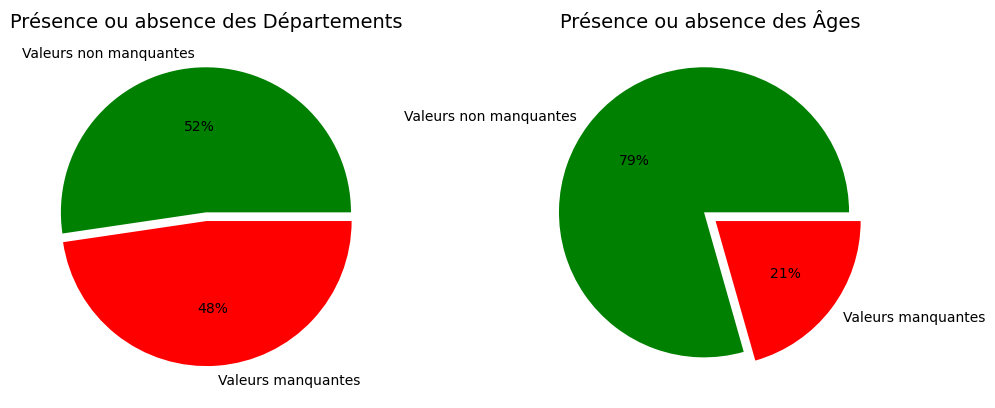

In [60]:
# Création de la figure avec deux sous-graphiques côte à côte
# Configuration des graphiques
fig, axes = plt.subplots(1, 2, figsize=(10, 12))  # 2 lignes, 1 colonne, taille personnalisée

# Données et paramètres pour le premier graphique
colors = ["green", "red"]
labels = ["Valeurs non manquantes", "Valeurs manquantes"]
explode = [0.03, 0.03]
bdd = data['Département'].notnull().value_counts()

# Premier graphique (Présence ou absence des Départements)
axes[0].pie(
    bdd, labels=labels, autopct="%0.0f%%", explode=explode,
    textprops={"color": '#000000'}, colors=colors
)
axes[0].set_title("Présence ou absence des Départements", fontsize=14)

# Données et paramètres pour le deuxième graphique
explode = [0.05, 0.05]
bdd1 = data['Âge'].notnull().value_counts()

# Deuxième graphique (Présence ou absence des Âges)
axes[1].pie(
    bdd1, labels=labels, autopct="%0.0f%%", explode=explode,
    textprops={"color": '#000000'}, colors=colors
)
axes[1].set_title("Présence ou absence des Âges", fontsize=14)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()


* ## VISUALISATION GRAPHIQUE DES DONNEES

C:\Users\DELL\AppData\Local\Temp\ipykernel_2852\1421094456.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




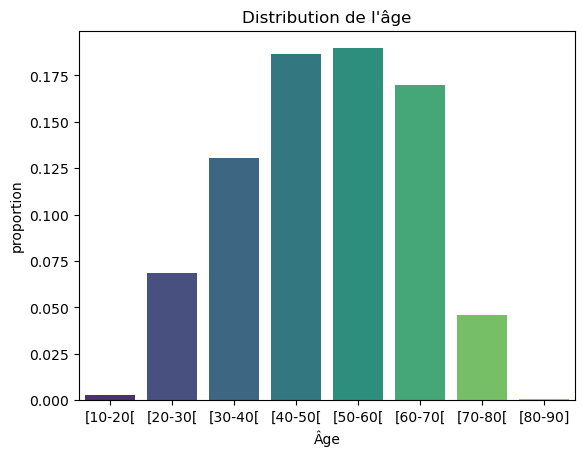

In [61]:
bins = [10,20,30,40,50,60,70,80,90]  # Limites des intervalles
labels = ['[10-20[', '[20-30[', '[30-40[', '[40-50[', '[50-60[', '[60-70[', '[70-80[','[80-90]']

# Utiliser pd.cut directement dans le graphique
sns.countplot(x=pd.cut(data['Âge'], bins=bins, labels=labels, include_lowest=False), palette='viridis', stat = 'proportion')
plt.title('Distribution de l\'âge')
plt.show()

* ## Distribution du nombre de vote par proposition

C:\Users\DELL\AppData\Local\Temp\ipykernel_2852\2795427885.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




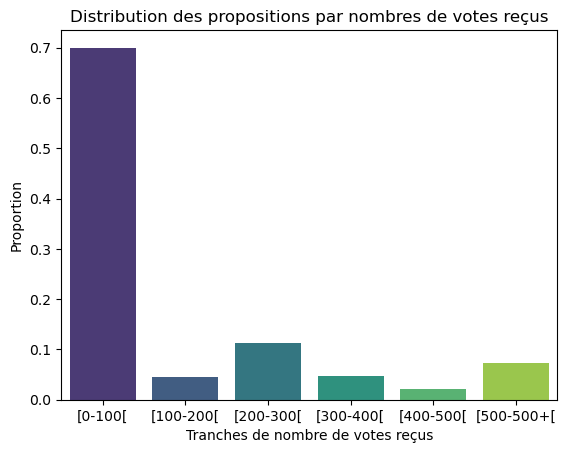

In [117]:
# Définir les intervalles et les étiquettes
bins = [0, 100, 200, 300, 400, 500, float('inf')]  # Limites des intervalles
labels = ['[0-100[', '[100-200[', '[200-300[', '[300-400[', '[400-500[', '[500-500+[']  # Noms des catégories

# Utiliser pd.cut directement dans le graphique
sns.countplot(x=pd.cut(data['Nb de votes'], bins=bins, labels=labels, include_lowest=True), palette='viridis', stat ='proportion')

# Ajouter les titres et labels
plt.title('Distribution des propositions par nombres de votes reçus')
plt.xlabel('Tranches de nombre de votes reçus')
plt.ylabel('Proportion')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_2852\2799486795.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




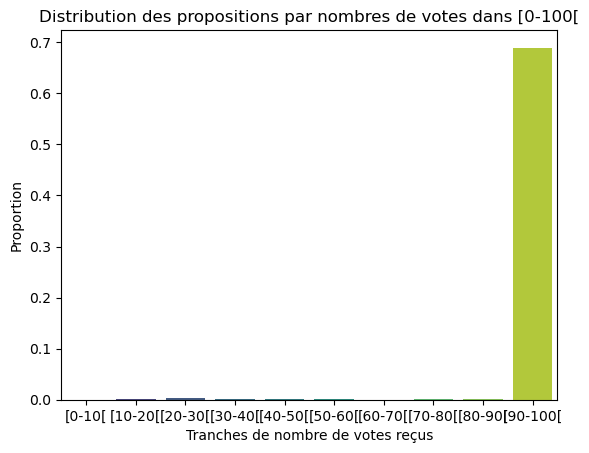

In [165]:
# Définir les intervalles et les étiquettes
bins = [0,10,20,30,40,50,60,70,80,90,100]  # Limites des intervalles
labels = ['[0-10[','[10-20[','[20-30[','[30-40[','[40-50[','[50-60[','[60-70[','[70-80[','[80-90[','[90-100[']  # Noms des catégories

# Utiliser pd.cut directement dans le graphique
#sns.countplot(x=pd.cut(data['Nb de votes'], bins=bins, labels=labels, include_lowest=True), palette='viridis', stat ='proportion')
#sns.histplot(data= data, x='Nb de votes',bins=bins, color=sns.color_palette('viridis', n_colors=10)[0], stat='proportion',cbar=True)
sns.countplot(x=pd.cut(data['Nb de votes'], bins=bins,labels=labels, include_lowest=True),palette='viridis', stat ='proportion')
#plt.xticks(ticks=np.arange(0,101,10))
# Ajouter les titres et labels
plt.title('Distribution des propositions par nombres de votes dans [0-100[')
plt.xlabel('Tranches de nombre de votes reçus')
plt.ylabel('Proportion')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_2852\1234976852.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




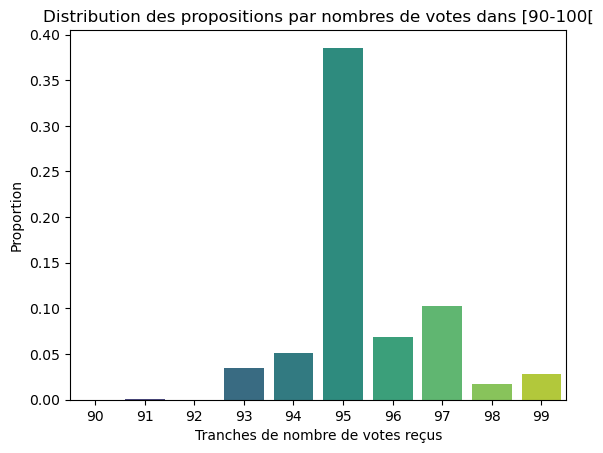

In [164]:
# Définir les intervalles et les étiquettes
bin = [90,91,92,93,94,95,96,97,98,99,100]  # Limites des intervalles
labels = ['90','91','92','93','94','95','96','97','98','99']  # Noms des catégories
#plt.xticks(ticks=np.arange(90,101,1))
# Utiliser pd.cut directement dans le graphique
#sns.countplot(x=pd.cut(data['Nb de votes'], bins=bins, labels=labels, include_lowest=True), palette='viridis', stat ='proportion')
#sns.histplot(data= data,x='Nb de votes',bins=bin, color=sns.color_palette('viridis', n_colors=10)[0], stat='proportion')
sns.countplot(x=pd.cut(data['Nb de votes'], bins=bin,labels=labels,include_lowest=True),
              palette='viridis', stat ='proportion')

# Ajouter les titres et labels
plt.title('Distribution des propositions par nombres de votes dans [90-100[')
plt.xlabel('Tranches de nombre de votes reçus')
plt.ylabel('Proportion')
plt.show()

* ## Analyse des votes

C:\Users\DELL\AppData\Local\Temp\ipykernel_2852\2954990707.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




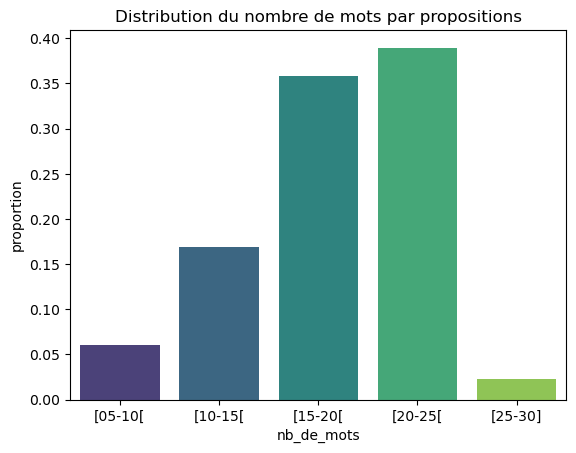

In [166]:
bins = [5,10,15,20,25,30]  # Limites des intervalles
labels = ['[05-10[','[10-15[', '[15-20[', '[20-25[','[25-30]']

sns.countplot(x = pd.cut(data['nb_de_mots'],bins = bins, labels = labels,include_lowest = True, right=True),palette = 'viridis',stat='proportion')
plt.title('Distribution du nombre de mots par propositions')
plt.show()

* ## Distribution du nombre de vote

In [191]:
# Fonction pour déterminer la catégorie dominante
def get_dominant_category(row):
    if row['% pour'] > row['% contre'] and row['% pour'] > row['% neutre']:
        if row['% pour'] >0.5:
            return 'pour'
        else :
            return 'indecis'
    elif row['% contre'] > row['% pour'] and row['% contre'] > row['% neutre']:
        if row['% contre'] >0.5:
            return 'contre'
        else :
            return 'indecis'
    else:
        if row['% neutre'] >0.5:
            return 'neutre'
        else :
            return 'indecis'

# Ajouter une nouvelle colonne
data['Catégorie'] = data.apply(get_dominant_category, axis=1)

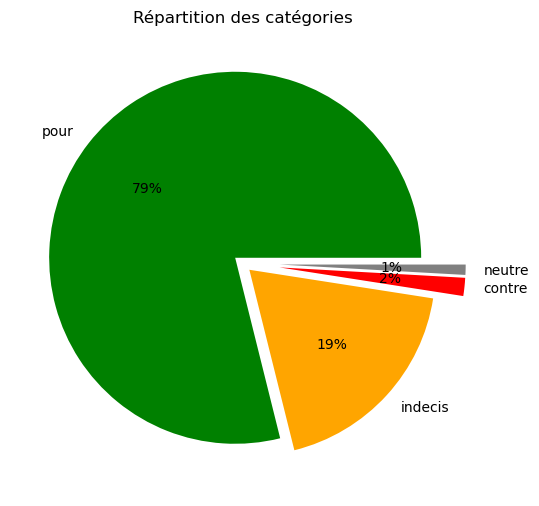

In [205]:
import matplotlib.pyplot as plt

# Calculer les proportions pour chaque catégorie
proportions = data['Catégorie'].value_counts(normalize=True)  # Proportions (%)
categories = proportions.index  # Les catégories
values = proportions.values  # Les proportions

# Paramètres du graphique
explode = [0.05] * (len(categories) - 2) + [0.2, 0.2]  # Sépare chaque tranche légèrement
labels = categories  # Labels provenant des catégories
colors = ['green','orange', 'red', 'grey'][:len(categories)]  # Limiter les couleurs à la taille des catégories

# Dessiner le camembert
plt.figure(figsize=(6,12))  # Ajuster la taille
plt.pie(
    values, labels=labels, autopct="%0.0f%%", explode=explode,
    textprops={"color": '#000000'}, colors=colors
)
plt.title("Répartition des catégories")
plt.show()


* ## Distribution moyenne des types de vote

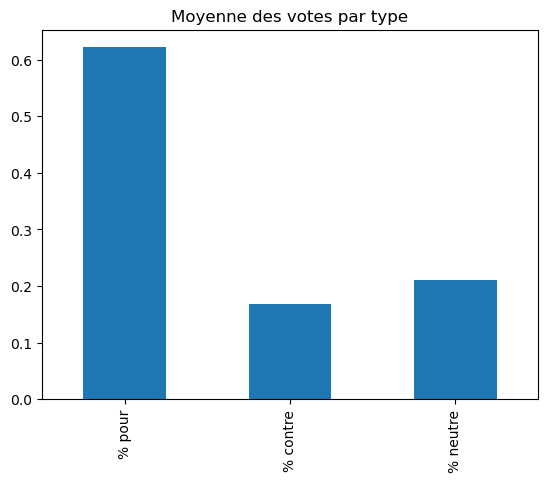

In [65]:
mean_votes = data[['% pour', '% contre', '% neutre']].mean()
mean_votes.plot(kind='bar', title='Moyenne des votes par type')
plt.show()

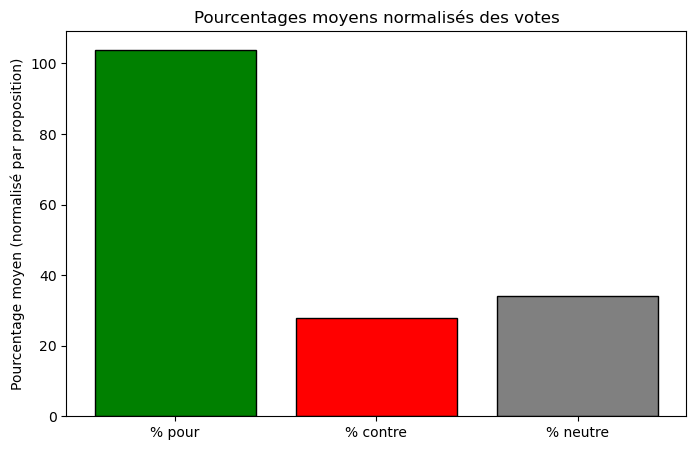

In [168]:
data['Nb de votes'] = data['Nb de votes'].replace(0, np.nan).fillna(1)

 

# Normalisation des pourcentages

data['% pour normalisé'] = data['% pour'] * data['Nb de votes']

data['% contre normalisé'] = data['% contre'] * data['Nb de votes']

data['% neutre normalisé'] = data['% neutre'] * data['Nb de votes']

 

# Calculer la moyenne des pourcentages normalisés

normalized_means = {

    '% pour': data['% pour normalisé'].mean(),

    '% contre': data['% contre normalisé'].mean(),

    '% neutre': data['% neutre normalisé'].mean()

}

 

# Création d'un DataFrame pour faciliter l'affichage

normalized_means_df = pd.Series(normalized_means)

 

# Tracer le diagramme en barres des pourcentages normalisés

plt.figure(figsize=(8, 5))

plt.bar(normalized_means_df.index, normalized_means_df.values, edgecolor='black', color=['green', 'red', 'grey'])

plt.title("Pourcentages moyens normalisés des votes")

plt.ylabel("Pourcentage moyen (normalisé par proposition)")

plt.show()

* ## Categorisation des propositions

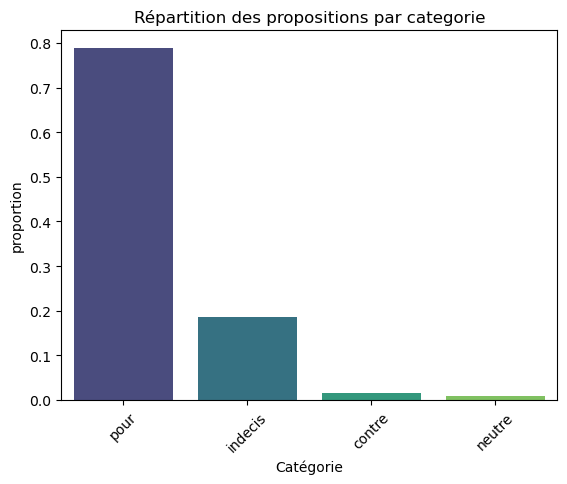

In [196]:
sns.countplot(data=data, x='Catégorie', palette='viridis', hue = "Catégorie",stat="proportion")
plt.title('Répartition des propositions par categorie')
plt.xticks(rotation=45)
plt.show()

* ## Distribution des zones d'adhésion

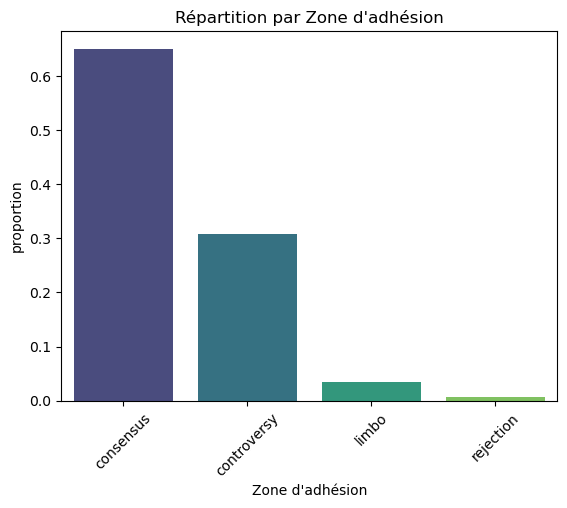

In [183]:
sns.countplot(data=data, x='Zone d\'adhésion', palette='viridis', hue="Zone d\'adhésion",stat='proportion')
plt.title('Répartition par Zone d\'adhésion')
plt.xticks(rotation=45)
plt.show()

* # Analyse des mots les plus fréquents dans les propositions (sans nettoyage initial).

In [206]:
from collections import Counter

# Compter les mots 
word_counts = Counter(" ".join(data['Proposition']).split())
print(word_counts.most_common(10)) 


[('Il', 1911), ('faut', 1907), ('les', 1554), ('de', 1440), ('des', 1052), ('et', 927), ('pour', 736), ('à', 727), ('le', 717), ('la', 688)]


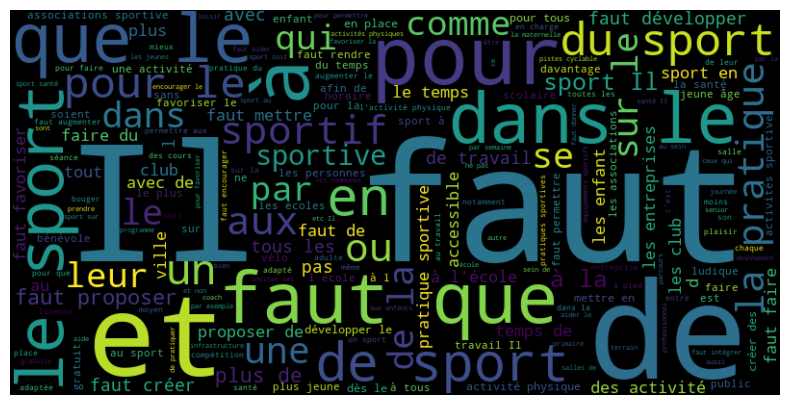

In [72]:
# Générer un nuage de mots à partir des propositions pour visualiser les mots les plus fréquents
# On fusionne toutes les propositions en une seule chaîne de caractères
text = " ".join(data['Proposition']) #
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)
plt.figure(figsize=(15, 5))
plt.imshow(wordcloud, interpolation="bilinear") # Pour afficher l'image avec une interpolation fluide
plt.axis("off") # Désactive les axes pour un affichage propre
plt.show()

* # Prétraitement des données textuelles

In [207]:
import unicodedata

def remove_accents(text):
    # Normalise le texte en supprimant les accents
    text = unicodedata.normalize('NFKD', text)
    text = ''.join(char for char in text if not unicodedata.combining(char))
    return text


In [208]:
import spacy
nlp = spacy.load("fr_core_news_sm") 
def preprocess_with_spacy(text):
    # Analyser le texte avec spaCy
    doc = nlp(text.lower())  # Mise en minuscule
    cleaned_tokens = []
    mots_inutils = ['faire','falloir','tous','sport','etre']
    for token in doc:
        if not token.is_stop and token.is_alpha and token.lemma_ not in mots_inutils:  # Exclure stopwords et non-alphabetiques
            cleaned_tokens.append(remove_accents(token.lemma_))  # Ajouter la forme lemmatisée du mot

    return " ".join(cleaned_tokens)
# Nettoyer les propositions
data['cleaned_propositions'] = data['Proposition'].apply(preprocess_with_spacy)

In [210]:
print(data['cleaned_propositions'])

0       sensibiliser enfant jeune age ecole maternel p...
1       commune faciliter marche ville amenager itiner...
2       ecole lien sante demontrer jeune meilleur moye...
3       rigoureux enfance etat esprit bienveillant dro...
4       permettre handicap souhaiter rencontrer struct...
                              ...                        
1904        adopter chien minimum minute marche fois jour
1905    pouvoir exclure membre federation resultat evi...
1906      reduire nombre arret bus ville obliger marche m
1907    inciter francais equiper montre connecter stim...
1908       encourager garcon inscrire club football rugby
Name: cleaned_propositions, Length: 1909, dtype: object


* ## Statistique descriptive des prpositions nettoyées

In [211]:
nb_mots = [len(proposition.split()) for proposition in data["cleaned_propositions"]]

# Créer un DataFrame
df = pd.Series(nb_mots)
# Afficher le résultat dans un format similaire
print(df.describe())

count    1909.000000
mean        8.062860
std         2.337648
min         1.000000
25%         7.000000
50%         8.000000
75%        10.000000
max        14.000000
dtype: float64


* ## Les mots les plus frequents

In [213]:
# Compter les mots 
word_counts = Counter(" ".join(data['cleaned_propositions']).split())
print(word_counts.most_common(20)) 

[('sportif', 543), ('activite', 295), ('pratique', 241), ('ecole', 211), ('physique', 165), ('temps', 159), ('club', 156), ('proposer', 148), ('enfant', 142), ('sante', 127), ('travail', 126), ('entreprise', 122), ('developper', 113), ('favoriser', 109), ('association', 107), ('mettre', 105), ('creer', 102), ('jeune', 96), ('permettre', 96), ('pouvoir', 94)]


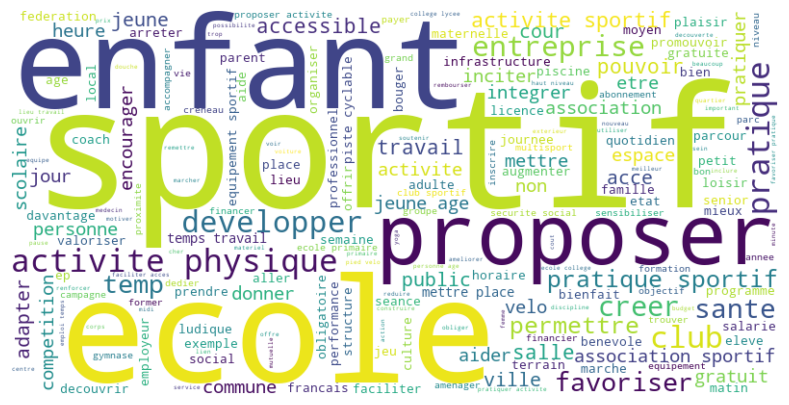

In [214]:
text = " ".join(data['cleaned_propositions']) 
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(15, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") # Désactive les axes pour un affichage propre
plt.show()

* # Modélisation des thématiques avec Word2Vec

In [79]:
# pip install --upgrade scipy gensim
# pip install gensim

In [215]:
from gensim.models import Word2Vec # Bibliothèque pour entraîner des modèles Word2Vec

In [269]:
# Tokenisation des phrases
tokenized_sentences = [text.split() for text in data['cleaned_propositions']]

# Entraîner le modèle Word2Vec
# vector_size : taille des vecteurs (100 dimensions)
# window : nombre de mots voisins considérés
# min_count : ignorer les mots qui apparaissent moins de 2 fois
# workers : nombre de cœurs utilisés pour le traitement
model = Word2Vec(sentences=tokenized_sentences, vector_size=300, window=14,sg=0,  min_count=1, workers=5)

# Exemples de mots similaires
print(model.wv.most_similar("sportif"))


[('pratique', 0.9996455907821655), ('activite', 0.9995619058609009), ('sante', 0.9995579123497009), ('ecole', 0.9994882941246033), ('club', 0.999470055103302), ('cours', 0.9994337558746338), ('mettre', 0.9994128942489624), ('ville', 0.9994090795516968), ('proposer', 0.9994019865989685), ('public', 0.9993917346000671)]


* # Entraîner Skip-Gram (sg=1) ou CBOW (sg=0)

In [82]:
# Entraîner Skip-Gram (sg=1) ou CBOW (sg=0)
skip_gram_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, sg=1, min_count=2)
cbow_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, sg=0, min_count=2)


* ## Optimisation des hyperparametres

In [240]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Fonction d'évaluation basée sur des paires de mots
def evaluate_model(word2vec_model, word_pairs):
    similarities = []
    for word1, word2 in word_pairs:
        if word1 in word2vec_model.wv and word2 in word2vec_model.wv:
            sim = cosine_similarity(
                [word2vec_model.wv[word1]], 
                [word2vec_model.wv[word2]]
            )[0][0]
            similarities.append(sim)
    return np.mean(similarities)


In [285]:
from itertools import combinations
mots = ['club','association','pratique','rural','cyclabe','activite','velo','ecole','entreprise']

# Générer toutes les paires uniques
word_pairs = list(combinations(mots, 2))



In [286]:
from gensim.models import Word2Vec
from itertools import product

# Définir les plages d'hyperparamètres
vector_sizes = [150, 200, 250,300]
windows = [5, 10, 14,17]
sgs = [0, 1]
min_counts = [1,2, 3, 5]

# Liste pour enregistrer les scores
results = []

# Combinaisons d'hyperparamètres
for vector_size, window, sg, min_count in product(vector_sizes, windows, sgs, min_counts):
    model = Word2Vec(
        sentences=tokenized_sentences,
        vector_size=vector_size,
        window=window,
        sg=sg,
        min_count=min_count,
        workers=5,
        epochs=10
    )
    score = evaluate_model(model, word_pairs)
    results.append({
        'vector_size': vector_size,
        'window': window,
        'sg': sg,
        'min_count': min_count,
        'score': score
    })

# Trier les résultats par score
sorted_results = sorted(results, key=lambda x: x['score'], reverse=True)
print(sorted_results[:5])  # Top 5 combinaisons


[{'vector_size': 300, 'window': 17, 'sg': 0, 'min_count': 1, 'score': 0.9998507}, {'vector_size': 300, 'window': 14, 'sg': 0, 'min_count': 1, 'score': 0.9998388}, {'vector_size': 300, 'window': 10, 'sg': 0, 'min_count': 1, 'score': 0.9998202}, {'vector_size': 250, 'window': 17, 'sg': 0, 'min_count': 1, 'score': 0.9998171}, {'vector_size': 250, 'window': 14, 'sg': 0, 'min_count': 1, 'score': 0.99980253}]


In [287]:
import random

# Définir les plages d'hyperparamètres
param_grid = {
    'vector_size': [150, 200, 250, 300],
    'window': [5, 10, 14, 17],
    'sg': [0, 1],
    'min_count': [1,2, 3, 5]
}

# Générer des combinaisons aléatoires
n_iter = 10
results = []

for _ in range(n_iter):
    params = {key: random.choice(values) for key, values in param_grid.items()}
    model = Word2Vec(
        sentences=tokenized_sentences,
        vector_size=params['vector_size'],
        window=params['window'],
        sg=params['sg'],
        min_count=params['min_count'],
        workers=5,
        epochs=10
    )
    score = evaluate_model(model, word_pairs)
    params['score'] = score
    results.append(params)

# Trier les résultats par score
sorted_results = sorted(results, key=lambda x: x['score'], reverse=True)
print(sorted_results[:5])  # Top 5 combinaisons


[{'vector_size': 300, 'window': 5, 'sg': 0, 'min_count': 3, 'score': 0.99971825}, {'vector_size': 200, 'window': 14, 'sg': 0, 'min_count': 2, 'score': 0.9997147}, {'vector_size': 250, 'window': 14, 'sg': 0, 'min_count': 3, 'score': 0.9997141}, {'vector_size': 300, 'window': 17, 'sg': 0, 'min_count': 5, 'score': 0.9996907}, {'vector_size': 150, 'window': 17, 'sg': 0, 'min_count': 2, 'score': 0.9995851}]


In [252]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [288]:
from skopt import gp_minimize
from skopt.space import Integer, Categorical

# Définir les plages d'hyperparamètres
search_space = [
    Integer(50, 300),        # vector_size
    Integer(2, 15),          # window
    Categorical([0, 1]),     # sg
    Integer(1, 10),          # min_count
    Integer(5, 50)           # epochs
]

# Liste pour suivre les résultats
results = []

# Fonction d'objectif avec enregistrement des résultats
def train_word2vec(params):
    # Extraire les hyperparamètres
    vector_size, window, sg, min_count, epochs = params

    # Créer et entraîner le modèle Word2Vec
    model = Word2Vec(
        sentences=tokenized_sentences,
        vector_size=vector_size,
        window=window,
        sg=sg,
        min_count=min_count,
        workers=5,
        epochs=epochs
    )
    
    # Évaluer le modèle
    score = -evaluate_model(model, word_pairs)  # Minimiser le score négatif
    
    # Enregistrer les résultats
    results.append((params, score))
    
    return score

# Optimisation bayésienne
result = gp_minimize(
    func=train_word2vec,
    dimensions=search_space,
    n_calls=20,
    random_state=42
)

# Trier les résultats par score (croissant car on minimise)
sorted_results = sorted(results, key=lambda x: x[1])

# Afficher les 5 meilleurs paramètres
print("Top 5 configurations :")
for i, (params, score) in enumerate(sorted_results[:5]):
    print(f"Rank {i+1}: Params={params}, Score={score}")

# Afficher les meilleurs paramètres globaux
print("\nBest parameters (global): ", result.x)


Top 5 configurations :
Rank 1: Params=[239, 8, 0, 6, 6], Score=-0.9996801018714905
Rank 2: Params=[205, 13, 0, 5, 10], Score=-0.9995356798171997
Rank 3: Params=[202, 13, 0, 5, 13], Score=-0.9989096522331238
Rank 4: Params=[300, 9, 0, 1, 20], Score=-0.9979463815689087
Rank 5: Params=[144, 4, 1, 2, 6], Score=-0.9977663159370422

Best parameters (global):  [239, 8, 0, 6, 6]


* # Analyse des thématiques

In [271]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [305]:
# Tokenisation des phrases
tokenized_sentences = [text.split() for text in data['cleaned_propositions']]

# Entraîner le modèle Word2Vec
# vector_size : taille des vecteurs (100 dimensions)
# window : nombre de mots voisins considérés
# min_count : ignorer les mots qui apparaissent moins de 2 fois
# workers : nombre de cœurs utilisés pour le traitement
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=14,sg=1,  min_count=2, workers=5)

# Exemples de mots similaires
print(model.wv.most_similar("sportif"))


[('inscription', 0.9979478120803833), ('adapter', 0.9979296326637268), ('creer', 0.997908353805542), ('club', 0.9978632926940918), ('voir', 0.997812032699585), ('annee', 0.9977370500564575), ('mutuelle', 0.997726321220398), ('aider', 0.997721791267395), ('financer', 0.9977093935012817), ('commune', 0.9977023601531982)]


* ## Analyse des mots

In [306]:
# Récupérer les mots et leurs vecteurs
words = list(model.wv.index_to_key)  # Tous les mots du vocabulaire
vectors = model.wv[words]  # Les vecteurs correspondants
print(words)
print(vectors)

['sportif', 'activite', 'pratique', 'ecole', 'physique', 'temps', 'club', 'proposer', 'enfant', 'sante', 'travail', 'entreprise', 'developper', 'favoriser', 'association', 'mettre', 'creer', 'jeune', 'permettre', 'pouvoir', 'age', 'acces', 'personne', 'pratiquer', 'velo', 'place', 'public', 'salle', 'adapter', 'cours', 'heure', 'accessible', 'ville', 'donner', 'scolaire', 'aider', 'encourager', 'non', 'social', 'inciter', 'equipement', 'lieu', 'gratuit', 'integrer', 'competition', 'espace', 'faciliter', 'etre', 'primaire', 'prendre', 'college', 'semaine', 'jeu', 'commune', 'horaire', 'jour', 'augmenter', 'bien', 'niveau', 'benevole', 'infrastructure', 'promouvoir', 'quotidien', 'adulte', 'aide', 'cyclable', 'ludique', 'pied', 'journee', 'davantage', 'seance', 'offrir', 'salarie', 'structure', 'securite', 'senior', 'parent', 'mieux', 'prix', 'ep', 'moyen', 'nombre', 'plaisir', 'grand', 'bienfait', 'licence', 'bouger', 'charge', 'piste', 'exemple', 'federation', 'organiser', 'marche', 'o

In [307]:

# Normalisation des vecteurs
scaler = StandardScaler()
vectors_normalized = scaler.fit_transform(vectors)
# Réduction des vecteurs à 2 dimensions (ACP)
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(vectors_normalized)


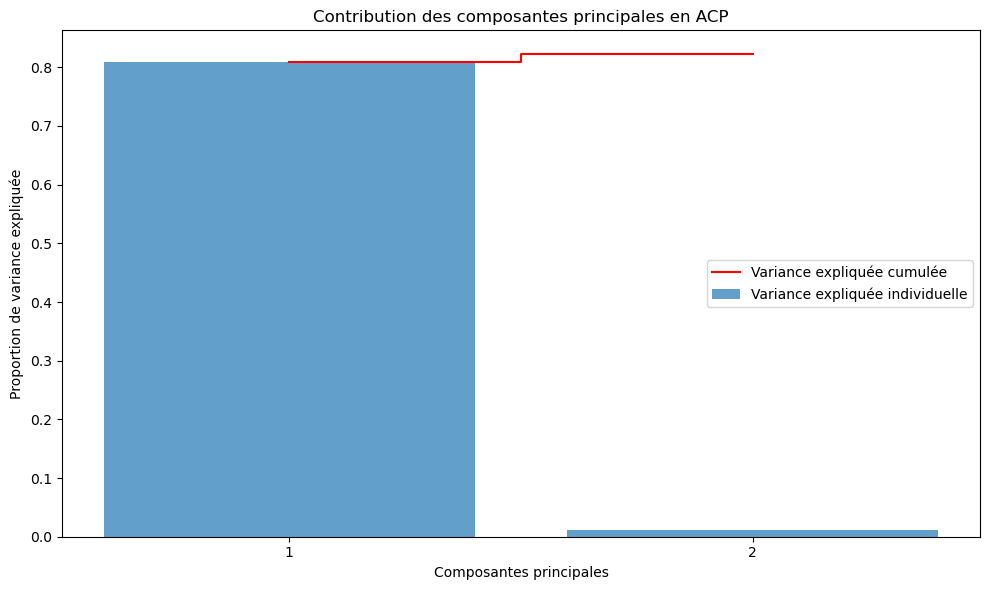

In [308]:
# Variance expliquée par chaque composante principale
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_cumsum = np.cumsum(explained_variance_ratio)

# Afficher les résultats
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center',
        label='Variance expliquée individuelle')
plt.step(range(1, len(explained_variance_ratio) + 1), explained_variance_cumsum, where='mid',
         label='Variance expliquée cumulée', color='red')
plt.xlabel('Composantes principales')
plt.ylabel('Proportion de variance expliquée')
plt.title('Contribution des composantes principales en ACP')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [309]:
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Composante {i+1}: Variance expliquée = {ratio:.2%}")

print(f"Variance expliquée cumulée (2 premières composantes) : {explained_variance_cumsum[1]:.2%}")

Composante 1: Variance expliquée = 80.97%
Composante 2: Variance expliquée = 1.22%
Variance expliquée cumulée (2 premières composantes) : 82.19%


In [310]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pandas as pd

# Normalisation des vecteurs
scaler = StandardScaler()
vectors_normalized = scaler.fit_transform(vectors)

# Réduction des vecteurs à 2 dimensions avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
word_vectors_2d = tsne.fit_transform(vectors_normalized)

# Appliquer le clustering K-Means
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(word_vectors_2d)

# Préparer les données pour le graphique
df = pd.DataFrame(word_vectors_2d, columns=['Dim1', 'Dim2'])
df['word'] = words  # Ajouter les mots correspondants
df['cluster'] = clusters  # Ajouter les labels des clusters

# Afficher un aperçu des données
print(df.head())


        Dim1       Dim2      word  cluster
0 -52.393620 -10.769806   sportif        2
1 -53.565777 -11.817090  activite        2
2 -53.644695  -7.617212  pratique        2
3 -49.822388  -2.954071     ecole        2
4 -45.456127 -11.343177  physique        2


In [311]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pandas as pd
import plotly.express as px

# Normalisation des vecteurs
scaler = StandardScaler()
vectors_normalized = scaler.fit_transform(vectors)

# Réduction des vecteurs à 2 dimensions avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
word_vectors_2d = tsne.fit_transform(vectors_normalized)

# Appliquer le clustering K-Means
n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(word_vectors_2d)

# Préparer les données pour le graphique
df = pd.DataFrame(word_vectors_2d, columns=['Dim1', 'Dim2'])  # Dimensions réduites avec t-SNE
df['word'] = words  # Ajouter les mots correspondants
df['cluster'] = clusters  # Ajouter les labels des clusters

# Créer le graphique interactif
fig = px.scatter(
    df,
    x='Dim1',
    y='Dim2',
    color='cluster',  # Utiliser les clusters pour la coloration
    hover_name='word',  # Afficher le mot lors du survol
    title="Projection des vecteurs de mots (t-SNE avec Clustering K-Means)",
    labels={'Dim1': 'Dimension 1', 'Dim2': 'Dimension 2'},
    color_continuous_scale='hsv',  # Choisir une palette de couleurs
    category_orders={"cluster": [str(i) for i in range(n_clusters)]},  # Assurez-vous que les clusters sont dans un ordre compréhensible
    width=1000,
    height=600
)

# Personnaliser les points
fig.update_traces(marker=dict(size=10, opacity=0.9, line=dict(width=1.5, color='white')))

# Ajouter un titre pour la légende des clusters
fig.update_layout(
    legend_title="Clusters",
    title_x=0.5,  # Centrer le titre
)

# Afficher le graphique
fig.show()


* ## Analyse des propositions

In [312]:
# Fonction pour calculer le vecteur moyen d'une proposition

def get_mean_vector(sentence, model):
    words = sentence.split()  # Tokenisation simple
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if word_vectors:  # Si des mots de la proposition sont dans le modèle
        return np.mean(word_vectors, axis=0)
    else:  # Si aucun mot de la proposition n'est dans le modèle
        return np.zeros(model.vector_size)


In [321]:
# Calculer un vecteur moyen pour chaque proposition

data['mean_vector'] = data_pour.apply(
    lambda row: get_mean_vector(row['cleaned_propositions'], model),
    axis=1
)
print(data['mean_vector'])


0       [-0.08438804, 0.14577898, 0.040164325, 0.04354...
1       [-0.083887696, 0.13248186, 0.032648705, 0.0427...
2       [-0.080336735, 0.14233163, 0.039984528, 0.0434...
3       [-0.07299903, 0.13073918, 0.03488611, 0.041969...
4       [-0.0722056, 0.12407422, 0.037176996, 0.040152...
                              ...                        
1904                                                  NaN
1905                                                  NaN
1906                                                  NaN
1907                                                  NaN
1908                                                  NaN
Name: mean_vector, Length: 1909, dtype: object


In [323]:
# Convertir les vecteurs en liste pour compatibilité avec kmeans
proposition_vectors = np.vstack(data_pour['mean_vector'].values)
len(proposition_vectors)

1506

In [325]:
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt  # Pour obtenir la palette 'tab10'

# Normalisation des vecteurs
scaler = StandardScaler()
vectors_normalized = scaler.fit_transform(proposition_vectors)

# Réduction des vecteurs à 2 dimensions avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
word_vectors_2d = tsne.fit_transform(vectors_normalized)

# Appliquer le clustering K-Means
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster = kmeans.fit_predict(word_vectors_2d)
data_pour['cluster'] = cluster

# Préparer les données pour le graphique
df1 = pd.DataFrame(word_vectors_2d, columns=['Dim1', 'Dim2'])
df1['propositions'] = data_pour['Proposition']
df1['cluster'] = cluster
df1['vote'] = data_pour['Catégorie']
df1['proposition_vectors'] = data_pour['mean_vector']

# Récupérer les couleurs de la palette 'tab10'
tab10_colors = [plt.cm.tab10(i) for i in range(n_clusters)]
tab10_colors_hex = [f'rgb({int(r*255)}, {int(g*255)}, {int(b*255)})' for r, g, b, _ in tab10_colors]

# Créer le graphique interactif avec Plotly
fig = px.scatter(
    df1,
    x='Dim1',
    y='Dim2',
    symbol='vote',  # Utiliser la colonne 'vote' pour les symboles
    color='cluster',  # Utiliser les clusters pour la coloration
    hover_name='propositions',  # Afficher les propositions lors du survol
    title="Projection des propositions (t-SNE avec Clustering K-Means)",
    labels={'Dim1': 'Dimension 1', 'Dim2': 'Dimension 2', 'vote': 'Avis des citoyens'},
    color_discrete_sequence='hsv',  # Utiliser la palette tab10 comme séquence discrète
    category_orders={"cluster": [str(i) for i in range(n_clusters)]},
    width=1000,
    height=600
)

# Personnaliser les points : ajouter des bordures
fig.update_traces(marker=dict(
    size=12,  # Taille des points
    opacity=0.8,  # Transparence
    line=dict(width=1, color='white')  # Bordure noire avec une épaisseur de 2
))

# Ajouter un titre pour la légende des clusters
fig.update_layout(
    legend_title="Clusters",
    title_x=0.3,  # Centrer le titre
    margin=dict(l=40, r=40, t=40, b=40)
)

# Afficher le graphique
fig.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_2852\890563998.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [316]:
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt  # Pour obtenir la palette 'tab10'

# Normalisation des vecteurs
scaler = StandardScaler()
vectors_normalized = scaler.fit_transform(proposition_vectors)

# Réduction des vecteurs à 2 dimensions avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
word_vectors_2d = tsne.fit_transform(vectors_normalized)

# Appliquer le clustering K-Means
n_clusters = 25
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster = kmeans.fit_predict(word_vectors_2d)
data['cluster'] = cluster

# Préparer les données pour le graphique
df1 = pd.DataFrame(word_vectors_2d, columns=['Dim1', 'Dim2'])
df1['propositions'] = data['Proposition']
df1['cluster'] = cluster
df1['vote'] = data['Catégorie']
df1['proposition_vectors'] = data['mean_vector']

# Récupérer les couleurs de la palette 'tab10'
tab10_colors = [plt.cm.tab10(i % 10) for i in range(n_clusters)]  # Cycle sur 'tab10' pour 25 clusters
tab10_colors_hex = [f'rgb({int(r*255)}, {int(g*255)}, {int(b*255)})' for r, g, b, _ in tab10_colors]

# Ajouter la couleur correspondant à chaque cluster dans le DataFrame
df1['color'] = df1['cluster'].map(lambda c: tab10_colors_hex[c])

# Créer le graphique interactif avec Plotly
fig = px.scatter(
    df1,
    x='Dim1',
    y='Dim2',
    symbol='vote',  # Utiliser la colonne 'vote' pour les symboles
    color='cluster',  # Utiliser les clusters pour la coloration
    hover_name='propositions',  # Afficher les propositions lors du survol
    title="Projection des propositions (t-SNE avec Clustering K-Means)",
    labels={'Dim1': 'Dimension 1', 'Dim2': 'Dimension 2', 'vote': 'Avis des citoyens'},
    color_discrete_sequence=tab10_colors_hex,  # Utiliser la palette tab10 comme séquence discrète
    category_orders={"cluster": [str(i) for i in range(n_clusters)]},
    width=1000,
    height=600
)

# Personnaliser les points : ajouter des bordures
fig.update_traces(marker=dict(
    size=12,  # Taille des points
    opacity=0.8,  # Transparence
    line=dict(width=1, color='white')  # Bordure blanche avec une épaisseur de 1
))

# Personnaliser les infobulles pour correspondre à la couleur des points
fig.update_traces(
    hovertemplate=(
        "<span style='background-color:%{customdata[0]}; "
        "padding:5px; border-radius:5px; color:white;'>"
        "<b>Proposition:</b> %{hovertext}<br>"
        "<b>Cluster:</b> %{marker.color}<br>"
        "<b>Vote:</b> %{customdata[1]}</span>"
    ),
    customdata=df1[['color', 'vote']]  # Transmettre la couleur et la catégorie (vote) comme données personnalisées
)

# Ajouter un titre pour la légende des clusters
fig.update_layout(
    legend_title="Clusters",
    title_x=0.3,  # Centrer le titre
    margin=dict(l=40, r=40, t=40, b=40)
)

# Afficher le graphique
fig.show()


In [ ]:
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt  # Pour obtenir la palette 'tab10'

# Normalisation des vecteurs
scaler = StandardScaler()
vectors_normalized = scaler.fit_transform(proposition_vectors)

# Réduction des vecteurs à 2 dimensions avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
word_vectors_2d = tsne.fit_transform(vectors_normalized)

# Appliquer le clustering K-Means
n_clusters = 25
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster = kmeans.fit_predict(word_vectors_2d)
data['cluster'] = cluster

# Préparer les données pour le graphique
df1 = pd.DataFrame(word_vectors_2d, columns=['Dim1', 'Dim2'])
df1['propositions'] = data['Proposition']
df1['cluster'] = cluster
df1['vote'] = data['Catégorie']
df1['proposition_vectors'] = data['mean_vector']

# Récupérer les couleurs de la palette 'tab10'
tab10_colors = [plt.cm.tab10(i % 10) for i in range(n_clusters)]  # Cycle sur 'tab10' pour 25 clusters
tab10_colors_hex = [f'rgb({int(r*255)}, {int(g*255)}, {int(b*255)})' for r, g, b, _ in tab10_colors]

# Ajouter la couleur correspondant à chaque cluster dans le DataFrame
df1['color'] = df1['cluster'].map(lambda c: tab10_colors_hex[c])

# Créer le graphique interactif avec Plotly
fig = px.scatter(
    df1,
    x='Dim1',
    y='Dim2',
    symbol='vote',  # Utiliser la colonne 'vote' pour les symboles
    color='cluster',  # Utiliser les clusters pour la coloration
    hover_name='propositions',  # Afficher les propositions lors du survol
    title="Projection des propositions (t-SNE avec Clustering K-Means)",
    labels={'Dim1': 'Dimension 1', 'Dim2': 'Dimension 2', 'vote': 'Avis des citoyens'},
    color_discrete_sequence=tab10_colors_hex,  # Utiliser la palette tab10 comme séquence discrète
    category_orders={"cluster": [str(i) for i in range(n_clusters)]},
    width=1000,
    height=600
)

# Personnaliser les points : ajouter des bordures
fig.update_traces(marker=dict(
    size=12,  # Taille des points
    opacity=0.8,  # Transparence
    line=dict(width=1, color='white')  # Bordure blanche avec une épaisseur de 1
))

# Personnaliser les infobulles pour correspondre à la couleur des points
fig.update_traces(
    hovertemplate=(
        "<span style='background-color:%{customdata[0]}; "
        "padding:5px; border-radius:5px; color:white;'>"
        "<b>Proposition:</b> %{hovertext}<br>"
        "<b>Cluster:</b> %{marker.color}<br>"
        "<b>Vote:</b> %{customdata[1]}</span>"
    ),
    customdata=df1[['color', 'vote']]  # Transmettre la couleur et la catégorie (vote) comme données personnalisées
)

# Ajouter un titre pour la légende des clusters
fig.update_layout(
    legend_title="Clusters",
    title_x=0.3,  # Centrer le titre
    margin=dict(l=40, r=40, t=40, b=40)
)

# Afficher le graphique
fig.show()


In [320]:
# Filtrer les lignes où la catégorie est "pour"
data_pour = data[data['Catégorie'] == 'pour']

# Afficher un aperçu du DataFrame filtré
print(data_pour)


                                            Proposition Nom d'auteur   Âge  \
0     Il faut sensibiliser les enfants depuis le plu...    DOMINIQUE  68.0   
1     Il faut que les communes facilitent la "marche...        Klaus  53.0   
2     Il faut dès l'école faire le lien entre la san...          Léo  46.0   
3     Il faut être très rigoureux des l'enfance sur ...        Cathy  60.0   
4     Il faut permettre à ceux ayant un handicap et ...     Bertrand   NaN   
...                                                 ...          ...   ...   
1826  Il faut permettre aux clubs de proposer des ac...   Darkdeamon   NaN   
1827   Il faut pouvoir accéder à toutes les disciplines       Joëlle  66.0   
1828  Il faut faire un bilan nutritionnel et un plan...     Laetitia  39.0   
1829  Il faut moins de sport comme le foot en cours ...         Jean  40.0   
1895  Il faut proposer des formules à caractère récu...         Fany  50.0   

      Département Zone d'adhésion  Nb de votes  Zone score  % p